In [ ]:
!nvidia-smi

In [ ]:
!pip install torchsummary

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import os
import copy

import random
import torch
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import transforms, utils
from torchsummary import summary

from trainer import *
from loss import *
from Unet import *
from preprocessing import *
from datagenerater import *
from utils import *
from progressbar import Bar
from PIL import Image


os.environ['CUDA_VISIBLE_DEVICES'] = '4'
image_size = (512, 512)
image_size = (384, 384)
image_size = (1024,1024)
n_classes = 1
train_batch = 4
test_batch = 1
loss = "dice"

SEED = 42
use_cuda = True
# Random seed
if SEED is None:
    SEED = random.randint(1, 10000)
random.seed(SEED)
torch.manual_seed(SEED)
if use_cuda:
    torch.cuda.manual_seed_all(SEED)
    
# HISTORY_PATH = "/mnt/nas125/InHwanKim/weight/rsm/segmentation(all)/600_data"
# HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet512_finetune/"
HISTORY_PATH = "/workspace/flat_feet/Unet/weight_unet1024_vgg16/"

In [3]:
import glob
from natsort import natsorted
from tqdm import trange 

x_path = '/workspace/flat_feet/dataset/flat_feet/image/'
    
y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]

x_train = list()
x_val = list()

for idx in trange(len(y_train)):
    x_train.append(glob.glob(x_path+y_train[idx].split('/')[-1].split('.')[0]+'*.png')[0])
for idx in trange(len(y_val)):
    x_val.append(glob.glob(x_path+y_val[idx].split('/')[-1].split('.')[0]+'*.png')[0])

len(x_train),len(y_train),len(x_val),len(y_val)

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 183.58it/s]


(900, 900, 123, 123)

torch.Size([1024, 1024]) torch.Size([1024, 1024])


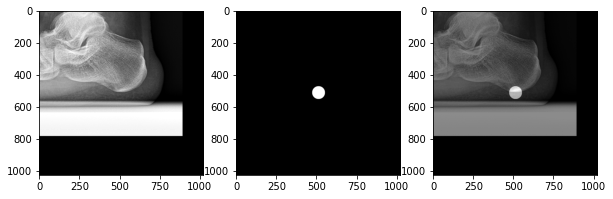

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/kevin/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 2.1s    
Epoch: 1. Train Dice:0.47011. Train Loss:0.52989
123/123: [===============================>] - ETA 0.4s   
Epoch: 1. Val Dice:0.86506. Val Loss:0.13494
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//0/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 2. Train Dice:0.84254. Train Loss:0.15746
123/123: [===============================>] - ETA 0.7s   
Epoch: 2. Val Dice:0.92853. Val Loss:0.07147
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//0/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. 

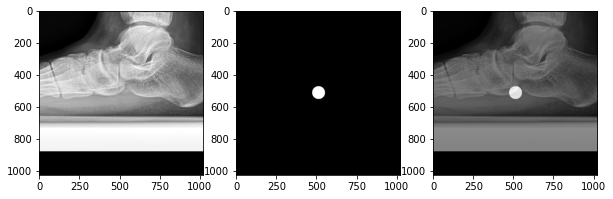

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.6s    
Epoch: 1. Train Dice:0.39508. Train Loss:0.60492
123/123: [===============================>] - ETA 0.4s   
Epoch: 1. Val Dice:0.73655. Val Loss:0.26345
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//1/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 2. Train Dice:0.72379. Train Loss:0.27621
123/123: [===============================>] - ETA 0.4s   
Epoch: 2. Val Dice:0.80715. Val Loss:0.19285
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//1/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. 

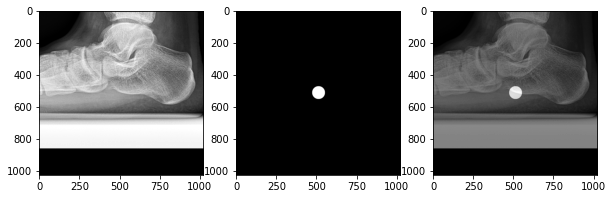

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.8s    
Epoch: 1. Train Dice:0.22497. Train Loss:0.77503
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.46324. Val Loss:0.53676
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//2/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.50614. Train Loss:0.49386
123/123: [===============================>] - ETA 0.5s   
Epoch: 2. Val Dice:0.74247. Val Loss:0.25753
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//2/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. 

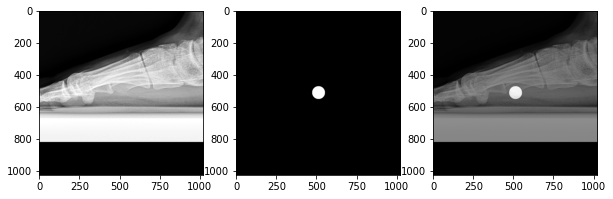

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.7s    
Epoch: 1. Train Dice:0.33515. Train Loss:0.66485
123/123: [===============================>] - ETA 0.4s   
Epoch: 1. Val Dice:0.83155. Val Loss:0.16845
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//3/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.78964. Train Loss:0.21036
123/123: [===============================>] - ETA 0.7s   
Epoch: 2. Val Dice:0.90202. Val Loss:0.09798
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//3/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.2s    
Epoch: 3. 

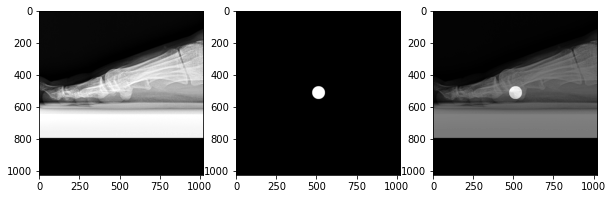

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.2s    
Epoch: 1. Train Dice:0.43682. Train Loss:0.56318
123/123: [===============================>] - ETA 0.7s   
Epoch: 1. Val Dice:0.84832. Val Loss:0.15168
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//4/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.2s    
Epoch: 2. Train Dice:0.80423. Train Loss:0.19577
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.87553. Val Loss:0.12447
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//4/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.2s    
Epoch: 3. 

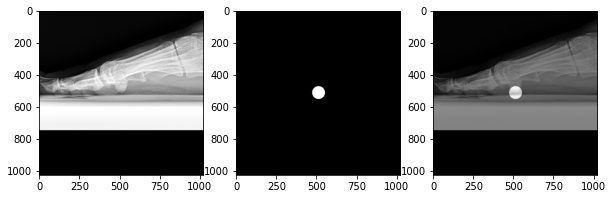

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.4s    
Epoch: 1. Train Dice:0.45966. Train Loss:0.54034
123/123: [===============================>] - ETA 0.6s   
Epoch: 1. Val Dice:0.86395. Val Loss:0.13605
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//5/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.83450. Train Loss:0.16550
123/123: [===============================>] - ETA 0.4s   
Epoch: 2. Val Dice:0.89958. Val Loss:0.10042
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//5/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. 

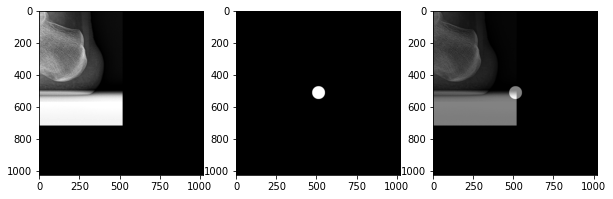

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.4s    
Epoch: 1. Train Dice:0.58334. Train Loss:0.41666
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.92803. Val Loss:0.07197
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//6/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 2. Train Dice:0.90807. Train Loss:0.09193
123/123: [===============================>] - ETA 0.3s   
Epoch: 2. Val Dice:0.94922. Val Loss:0.05078
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//6/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 0.9s    
Epoch: 3. 

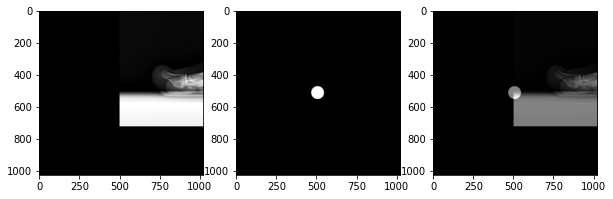

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.3s    
Epoch: 1. Train Dice:0.48232. Train Loss:0.51768
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.88208. Val Loss:0.11792
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//7/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.4s    
Epoch: 2. Train Dice:0.88602. Train Loss:0.11398
123/123: [===============================>] - ETA 0.4s   
Epoch: 2. Val Dice:0.96125. Val Loss:0.03875
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//7/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 3. 

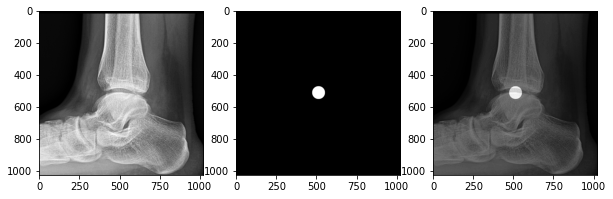

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.8s    
Epoch: 1. Train Dice:0.46219. Train Loss:0.53781
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.81067. Val Loss:0.18933
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//8/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.1s    
Epoch: 2. Train Dice:0.77731. Train Loss:0.22269
123/123: [===============================>] - ETA 0.7s   
Epoch: 2. Val Dice:0.76865. Val Loss:0.23135
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. Train Dice:0.80857. Train Loss:0.19143
123/123: [===============================>] - ETA 0.3s   
Epoch: 3. Val Dice:0.83114. Val Loss:0.16886
********************************************************************************
model_save! /

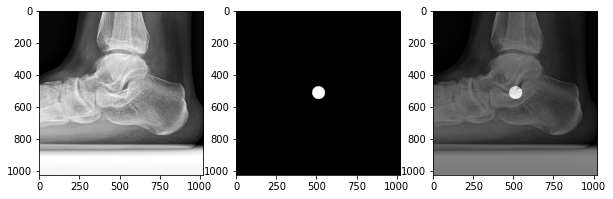

no weight
Use GPU: cuda for training
900/900: [===============================>] - ETA 1.2s    
Epoch: 1. Train Dice:0.35338. Train Loss:0.64662
123/123: [===============================>] - ETA 0.3s   
Epoch: 1. Val Dice:0.79801. Val Loss:0.20199
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//9/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.4s    
Epoch: 2. Train Dice:0.76789. Train Loss:0.23211
123/123: [===============================>] - ETA 0.4s   
Epoch: 2. Val Dice:0.84484. Val Loss:0.15516
********************************************************************************
model_save! /workspace/flat_feet/Unet/weight_unet1024_vgg16//9/weight.pth
********************************************************************************
900/900: [===============================>] - ETA 1.0s    
Epoch: 3. 

In [ ]:
maximum_loss = [1.0]*25
for LN in range(0,13,1):

#     DIR = '/mnt/nas125/InHwanKim/data/rsm/data(600)/'
# #     DIR = '/workspace/flat_feet/Unet/'

#     x_train = np.load(DIR + "train_images.npy")
#     y_train = np.load(DIR + "train_points.npy")
#     x_val = np.load(DIR + "valid_images.npy")
#     y_val = np.load(DIR + "valid_points.npy")
    
#     x_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[:900]
#     y_train = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[:900]
#     x_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/image/*.png'))[900:1023]
#     y_val = natsorted(glob.glob('/workspace/flat_feet/dataset/flat_feet/label/*.npy'))[900:1023]
    
    #x_test = np.load(DIR + "pjw_x_test.npy")
    #y_test = np.load(DIR + "pjw_y_test.npy")

    transform_train = transforms.Compose([
    Gamma_2D(),
    Shift_2D(),
    RandomBrightness(),
    Rotation_2D(),
    RandomSharp(),
    RandomBlur(),
    RandomNoise(),
    Invert(),
    RandomClahe(),
    ToTensor(),
    ])

    transform_test = transforms.Compose([
        ToTensor(),
    ])


    trainset = Dental_Single_Data_Generator(
        image_size, x_train, y_train, landmark_num = LN, mode = "train", transform=transform_train
    )
    trainloader = DataLoader(trainset, batch_size=train_batch, shuffle=True)

    testset = Dental_Single_Data_Generator(
        image_size, x_val, y_val, landmark_num = LN, mode = "train", transform=transform_test
    )
    testloader = DataLoader(testset, batch_size=1, shuffle=False)
    
    for j in range(0,1,1):
        sample = next(iter(testloader))
        image = sample['image'][0]
        mask = sample['landmarks'][0]
        
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 3, 1)
        image = np.squeeze(image,0)
        plt.imshow(image, 'gray')
        plt.subplot(1, 3, 2)
        mask = np.squeeze(mask,0)
        plt.imshow(mask,'gray')
        plt.subplot(1, 3, 3)
        print(image.shape, mask.shape)
        add = image + mask
        plt.imshow(add,'gray')
        plt.show() 
        
    
#     model = UNet(n_channels = 1, n_classes = 1)
    import segmentation_models_pytorch as smp
    # model = smp.Unet(encoder_name='timm-tf_efficientnet_lite4',decoder_attention_type='scse', in_channels = 1, classes = 1)
    # model = smp.Unet(encoder_name='timm-tf_efficientnet_lite4',decoder_attention_type=None, in_channels = 1, classes = 1)
    model = smp.Unet(encoder_name='vgg16', decoder_attention_type='scse', in_channels = 1, classes = 1)
    try:
        weight_file = natsorted(glob.glob(HISTORY_PATH+str(LN)+'/*'))[-1]
        weight = torch.load(weight_file)
        model.load_state_dict(weight)
        print('load weight')
    except:
        print('no weight')
    
    if torch.cuda.device_count() > 1:
        print("Let's use", torch.cuda.device_count(), "GPUs!")      
        model = nn.DataParallel(model)

    device = torch.device('cuda')

    if device is not None:
        print("Use GPU: {} for training".format(device))

    if not torch.cuda.is_available():
        print('using CPU, this will be slow')
    else:
        model.to(device)

    #summary(model, input_size=(1, 512, 512))
    best_acc_wts = copy.deepcopy(model.state_dict())

    #criterion = BinaryDiceLoss().cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr = 5e-4)    
    
    mean_train_losses = []
    mean_val_losses = []
    
    for epoch in range(10):
        train_losses = []
        train_dice = []
        val_losses = []
        val_dice = []
        
        
        for batch_idx, sample in enumerate(Bar(trainloader)):    

            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)

            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)

            train_losses.append(loss.data.cpu().numpy())
            train_dice.append(ddice.data.cpu().numpy())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        print('Epoch: {}. Train Dice:{:.5f}. Train Loss:{:.5f}'.format(epoch+1, np.mean(train_dice), np.mean(train_losses)))

        for batch_idx, sample in enumerate(Bar(testloader)):    
            images,masks = sample['image'].to(device), sample['landmarks'].to(device)

            outputs = model(images)
            outputs= torch.sigmoid(outputs)
            loss = dice_loss(outputs, masks)
            ddice = dice(outputs, masks)
            val_losses.append(loss.data.cpu().numpy())
            val_dice.append(ddice.data.cpu().numpy())
            
        print('Epoch: {}. Val Dice:{:.5f}. Val Loss:{:.5f}'.format(epoch+1, np.mean(val_dice), np.mean(val_losses)))

        mean_train_losses.append(np.mean(train_losses))
        mean_val_losses.append(np.mean(val_losses))
        # Print Loss
        if(np.mean(val_losses) < maximum_loss[LN]):
            maximum_loss[LN] = np.mean(val_losses)
            
            directory = HISTORY_PATH  + "/" +str(LN)
            
            if not os.path.exists(directory):
                os.makedirs(directory)
                
            filename = directory  + "/"  +'weight.pth'                          
            torch.save(model.state_dict(), filename)
            print("*"*80)
            print("model_save!",filename)
            print("*"*80)